GRAPHES : REPRESENTATION
=======================================================================

> ***Objet***   
> Ce document montre comment représenter la structure de donnée **Graphe** en Python.  
> On utilisera plusieurs formes de représentation: 
> - un schéma
> - une liste d'adjacence
> - une matrice d'adjacence

***********************************************************************

I - DEFINITION DU GRAPHE
=======================================================================

Un graphe est donné par son _ensemble de sommets_ `V` ( **Vertex** ) et son _ensemble d'arrêtes_ `E` ( **Edge** ).  
Chaque sommet est désigné par un identifiant ( on prend une lettre pour l'aspect visuel ).  
Chaque arrête est désignée par un tuple `(id_sommet_départ, id_sommet_arrivée )`.  


![GRAPHE](./__assets__/001.png)
*Exemple de graphe non orienté*

II - REPRESENTATION PAR ENSEMBLES
=======================================================================


In [9]:
class Graph:
    
    def __init__(self, vertices=None, edges=None, directed=False ):
        self.vertices = sorted(vertices) or list()  # could be a set !
        self.edges = edges or list()        # could be a set !
        self.directed = directed
    
    def __str__(self):
        return  "GRAPH : \n"  \
                "  - vertices = {0} \n" \
                "  - edges = {1} \n".format(self.vertices , self.edges)


In [10]:
v = [ 'A', 'B', 'E', 'F', 'C' ]  # unsorted
e = [ ('A','B') , ('A','C') , ('B','E') , ('B','C') , ('C','E') , ('C','F') ]

g = Graph(v, e)

print(g)


GRAPH : 
  - vertices = ['A', 'B', 'C', 'E', 'F'] 
  - edges = [('A', 'B'), ('A', 'C'), ('B', 'E'), ('B', 'C'), ('C', 'E'), ('C', 'F')] 



### Problème de doublons d'arrêtes

Un premier problème se présente :  ce graphe est non orienté , on aurait pu dénombrer tous les sens des arrêtes pour la liste d'arrêtes .  

```python

e = [ 
    ('A','B') , ('B','A') , ('A','C') , ('C','A') , 
    ('B','E') , ('E','B') , ('B','C') , ('C','B') , 
    ('C','E') , ('E','C') , ('C','F') , ('F','C') ,
] 

```

et avoir alors une redondance inutile dans la représentation.  

`E1` et `E2` sont deux arrêtes identiques si :  

```python 
    E1[0] == E2[0] and E1[1] == E2[1]  or  E1[0] == E2[1] and E1[1] == E2[0] 
```

en pratique , on peut supposer qu'une arrête n'a pas été inscrite n fois sur la même séquence , donc on ne s'intéresse qu'à la dernière partie du choix  

```python
    E1[0] == E2[1] and E1[1] == E2[0]
```

##### Comment dédoublonner ?  

parcourir la collection d'arrête , 
- pour chaque arrête `curr_e` :  
    - vérifier pour chaque suivante `other_e` qu'elle n'est pas identique
    - supprimer cette dernière le cas échéant.

In [13]:
def dedulicate_edges(edges):

    def same_edge(e1,e2):
        return e1[0]==e2[1] and e1[1]==e2[0]
    
    for idx,current in enumerate(edges):      # tuple (index, value) unpacked
        for other in edges[idx:]:             # slice rest of the list
            if same_edge(current,other):
                edges.remove(other)
                break                         # assume only 1 duplicate

edges_demo =[ 
    ("A","B") , ("A","D") , 
    ("B","A") , ("D","G") , 
    ("D","E") , ("E","D") , 
    ("G","D") , ("G","K") 
]

dedulicate_edges(edges_demo)
edges_demo

[('A', 'B'), ('A', 'D'), ('D', 'G'), ('D', 'E'), ('G', 'K')]

***********************************************************************

II - REPRESENTATION PAR SCHEMA
=======================================================================

1. Le graphe est transformé en dataframe **pandas**  
    - dictionnaire origine et fin de deux listes des liaisons         
2. Le graphe est instancié par **networkx**
    - l'objet obtenu (graphe networkx) peut être affiché

In [14]:
def graph_to_edgelist(graph):
    edgelist = {"from":list(), "to":list()}
    for edge in graph.edges:
        edgelist["from"].append(edge[0])
        edgelist["to"].append(edge[1])
    return edgelist


In [15]:
edge_dict = graph_to_edgelist(g)
edge_dict


{'from': ['A', 'A', 'B', 'B', 'C', 'C'], 'to': ['B', 'C', 'E', 'C', 'E', 'F']}

On peut utiliser les bibliothèques suivantes pour tracer le graphe :   
- numpy
- pandas 
- networkx
- matplotlib

In [16]:
import pandas as pd

# construction de la DataFrame pandas
df = pd.DataFrame(edge_dict)
display(df)
 

,from,to
0,A,B
1,A,C
2,B,E
3,B,C
4,C,E
5,C,F


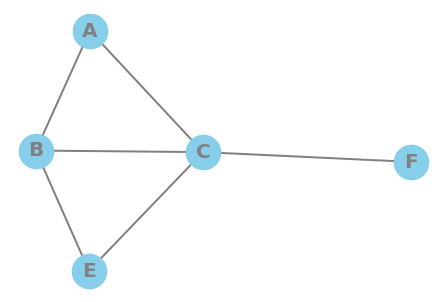

In [19]:
import networkx as nx

# construit le graphe d'après la DataFrame
G=nx.from_pandas_edgelist(df, 'from', 'to')
 
# et trace le graphe avec quelques options
nx.draw(G, 
        with_labels=True       , 
        node_size=1000         , 
        node_color="skyblue"   , 
        node_shape="o"         , 
        alpha=1                , 
        linewidths=4           , 
        font_size=20           , 
        font_color="grey"      , 
        font_weight="bold"     , 
        width=2                , 
        edge_color="grey"      ,
       )


*Graphe exemple*

***********************************************************************

III - REPRESENTATION PAR LISTE D'ADJACENCE
=======================================================================

On utilise un dictionnaire :  

```python 
gal = { 
    'A' : ['B','C']       ,
    'B' : ['A','C','E']   ,
    'C' : ['B','E','F']   ,
    'E' : ['B','C']       ,
    'F' : ['C']           ,
}
```


### Sens : ensemble -> liste d'adjacence

On doit passer de `G(Vertices,Edges)` à `AdjacencyList(dict)` , mais il nous faut tenir compte des relations réciproques, donc dupliquer les arrêtes en orientation inverse.



In [20]:
# duplication des arrêtes
def full_edges_list(graph):
    fulllist = list()
    for edge in graph.edges:
        t1 = edge
        t2 = edge[1],edge[0]
        fulllist.append(t1)
        fulllist.append(t2)
    return fulllist

fel = full_edges_list(g)
fel

[('A', 'B'),
 ('B', 'A'),
 ('A', 'C'),
 ('C', 'A'),
 ('B', 'E'),
 ('E', 'B'),
 ('B', 'C'),
 ('C', 'B'),
 ('C', 'E'),
 ('E', 'C'),
 ('C', 'F'),
 ('F', 'C')]

In [22]:
def to_adjacency_list(graph):
    gal = {x:list() for x in graph.vertices}
    all_edges = full_edges_list(graph)
    for edge in full_edges_list(graph):
        v1,v2 = edge # unpacked
        gal[v1].append(v2)
    return gal

galdemo = to_adjacency_list(g)
galdemo

{'A': ['B', 'C'],
 'B': ['A', 'E', 'C'],
 'C': ['A', 'B', 'E', 'F'],
 'E': ['B', 'C'],
 'F': ['C']}

### Sens : liste d'ajacence -> ensemble

On doit passer de `AdjacencyList(dict)` à `G(Vertices,Edges)`, mais il nous faut supprimer  les relations réciproques, donc dédoublonner les arrêtes en orientation inverse.

In [27]:
def from_adjacency_list(al: dict) -> Graph:
    vert_list = [v for v in al.keys()]
    edge_list = list()
    for v in vert_list:
        neighbors = al[v]
        for n in neighbors:
            edge = v,n
            edge_list.append( edge )
    dedulicate_edges(edge_list)
    return Graph(vertices=vert_list,edges=edge_list,directed=False)

g2 = from_adjacency_list(galdemo)
print(g2)

GRAPH : 
  - vertices = ['A', 'B', 'C', 'E', 'F'] 
  - edges = [('A', 'B'), ('A', 'C'), ('B', 'E'), ('B', 'C'), ('C', 'E'), ('C', 'F')] 



***********************************************************************

IV - REPRESENTATION PAR MATRICE D'ADJACENCE
=======================================================================

On veut représenter le graphe par une matrice de {V}X{V}.  
Cette matrice sera symétrique carrée pour un graphe non orienté.   


### Sans bibliothèque

In [25]:
def to_adjacency_matrix(graph):
    dim = range( len(graph.vertices) )
    matrix_labels = graph.vertices
    m = [[0 for c in dim] for l in dim ]
    all_edges = full_edges_list(graph)
    for edge in all_edges:
        line = matrix_labels.index(edge[0])
        col  = matrix_labels.index(edge[1])
        m[line][col]=1
    return m

mat = to_adjacency_matrix(g)
mat

[[0, 1, 1, 0, 0],
 [1, 0, 1, 1, 0],
 [1, 1, 0, 1, 1],
 [0, 1, 1, 0, 0],
 [0, 0, 1, 0, 0]]

### Avec la bibliothèque numpy

In [26]:
import numpy as np

def to_numpy_matrix(graph):
    dim = len(graph.vertices)
    m = np.zeros( (dim,dim),dtype=int )
    all_edges = full_edges_list(graph)
    for edge in all_edges:
        line = graph.vertices.index(edge[0])
        col  = graph.vertices.index(edge[1])
        m[line][col]=1
    return m

nmat = to_numpy_matrix(g)
nmat

array([[0, 1, 1, 0, 0],
       [1, 0, 1, 1, 0],
       [1, 1, 0, 1, 1],
       [0, 1, 1, 0, 0],
       [0, 0, 1, 0, 0]])

### Sens : matrice -> ensemble

In [44]:
arr = [ [10,20,30] , [40,50,60] , [70,80,90]] #3X3
lstvert = [chr( ord("A") + x) for x in range(len(arr))]
print(lstvert)
print("value at 0 : " , lstvert[0])

dictedge = {x:list() for x in lstvert}
print(dictedge)

['A', 'B', 'C']
value at 0 :  A
{'A': [], 'B': [], 'C': []}


In [53]:
def from_adjacency_matrix(mat, vert_list):
    dim = len(mat) 
    adj_list  = {x:list() for x in vert_list}
    for c in range(dim):
        for l in range(dim):
            if mat[l][c]==1:
                adj_list[vert_list[c]].append(vert_list[l])
    return adj_list
                
from_adjacency_matrix(mat, ["A","B","C","E","F"])

{'A': ['B', 'C'],
 'B': ['A', 'C', 'E'],
 'C': ['A', 'B', 'E', 'F'],
 'E': ['B', 'C'],
 'F': ['C']}

***********************************************************************

CONCLUSION
=======================================================================

On peut représenter un graphe :

- par un diagramme ( en utilisant le logiciel Yed par exemple
- par une liste d'adjacence
- par une matrice d'adjacence


***Remarque***  

sur une matrice d'adjacence , on peut avoir un intérêt à inscrire sur la diagonale le **degré d'un sommet** ( son nombre de voisins ).  
cela peut être uniquement fait si le graphe ne comporte pas de boucle ( un sommet en relation avec lui-même - à ne pas confondre avec un cycle ! - )
la matrice obtenue est la **matrice hamiltonienne du graphe**.

***********************************************************************

> **Références**  
> - Yed : https://www.yworks.com/products/yed
> - la chaine "à la découverte des graphes" : https://www.youtube.com/channel/UCHtJVeNLyR1yuJ1_xCK1WRg
> - Packed : Python Data Structures and Algorithms ( Benjamin Baka )